# Homework #7-Updated for Q1&Q5 (100 pts)
**Due:** Thursday March 1st, 11:59PM via Blackboard.  

**Name:** **Anish Doshi**,  **Student Id:** **ap2326**

In this homework we will review a bit about traffic engineering, and start learning about delays (queues) in networks and how to simulate them.

## Problem 1.  Traffic Engineering Review Questions (20 pts)

**(a)** How many paths are available between a source and a destination node in a tree network?
**Ans:** *Single path* is available from source to destination in a tree network.


**(b)** What "control plane protocol" causes problems if an Ethernet network contains loops?
**Ans:** *Local Bridge Protocol* causes issues if an Ethernet network contains loops. **-2 Learning bridge, and its not a protocol**


**(c)** Can we use shortest paths to forward packets in an Ethernet network using SDNs? If so what packet header field(s) would we match on?
**Ans:** Yes, we can use shortest paths to forward packets in an Ethernet network using SDNs. We would match the packet header fields with the *ethernet destination address type*.


**(d)** Can we use shortest paths to forward IP packets without OSPF in an SDN network? If so what packet header field(s) would we match on?
**Ans:** Yes, we can use shortest paths to forward packets withput OSPF in an SDN network. We would match the packet header fields with the *IPv4 destination address type*. 


**(e)** Would you every want to use something other than the shortest path for transmission between two nodes in a packet switched network? If so give an example.
**Ans:** Widest path can be useful in transportation planning, city roads structure makings.


**(f)** Can you name any other path computation techniques that we've used in class other than shortest paths? If so list them.
**Ans:** Shortest path computation , Widest path computation, k-shortest path computation and minimum spanning tree path computation are the different techniques we discussed in class.


**(g)** If you have a network that contains many loops can you ever find a tree subgraph for that network?  What must that tree subgraph include?
**Ans:** Yes, we can find a tree subgraph for that network. A tree subgraph must include all the nodes of the network. Also, it must have enough edges connecting all nodes in some way.



In [1]:
# The following enables embedded ploting via matplot lib.
%matplotlib notebook
import matplotlib.pyplot as plt

## Problem 2. Random Variables, Histograms, and Generators in Python


**(a)** Generate and print 10 samples of a uniformly distributed continuous random variable with plain Python.  Used 10,000 samples (don't print!) to compute the mean and compare against theory.

**(b)** Generate an print 10 samples of a Bernoulli random variable with $p = 0.31$ Used 10,000 samples (don't print!) to compute the mean and compare against theory.

**(c)** Generate and plot the histogram (see [histogram2.py](http://www.grotto-networking.com/files/DESPython/histogram2.py) for an example) based on 100,000 samples of an exponential distribution with parameter $\lambda = 0.43$

**(d)** Write a Python generator function that creates a generator that outputs fo91rever the sequence of strings: "Hi CS6591", "From your_name", "Hi CS6591", "From your_name", "Hi CS6591", "From your_name", ... Show the definition of the generator and its use.


#Part(2a)

A continuous uniform distribution is denoted by

X∼U(a,b), with a≤b
Here a and b, are limits of the interval over which the distribution is effectively defined.

It is used to model a scenario where a continuous random variable can take values that are equally distributed (with equal probability) in an interval.

In [2]:
#Part(2a)

import random

print(f"Ten samples of a Uniformly Distributed Continuous Random Variable : ")
for i in range(10):
    print(random.random())
sum2 = 0.0
for i in range(10000):
    sum2 += random.random()
print(f"\nAverage: {sum2/10000}")    


Ten samples of a Uniformly Distributed Continuous Random Variable : 
0.025665187692048397
0.11025096571751847
0.36607705683946645
0.6512800478403358
0.4809675791574831
0.12843310216497716
0.5596687715432259
0.5048270403625252
0.3419840994760853
0.9521095598138907

Average: 0.5000889417457022


#Part(2b)

Bernoulli random variable distribution is the probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability 1-p. The probability distribution of any single experiment that asks a yes–no question. The question results in a boolean-valued outcome.

In [3]:
#Part(2b)

from scipy.stats import bernoulli

print(f"Ten samples of a Bernoulli Random Variable with  p=0.31 : ")
myrv = bernoulli(p=0.31)
print(myrv.rvs()) 
for i in range(10):
    print(myrv.rvs())
n = 10000
sum1 = 0.0
for i in range(n):
    sum1 += myrv.rvs()
print(f"Average: {sum1/n}")     

Ten samples of a Bernoulli Random Variable with  p=0.31 : 
0
0
0
0
1
0
0
0
1
0
0
Average: 0.3086


Exponential Samples(first ten samples) : [1.6442002162511706, 4.788165017655739, 1.5507536608379133, 0.3263452604263463, 0.8763557005141884, 0.486269841415293, 3.6431983550720446, 3.8839954602714317, 1.9027987789015073, 4.363425279468017]


<IPython.core.display.Javascript object>


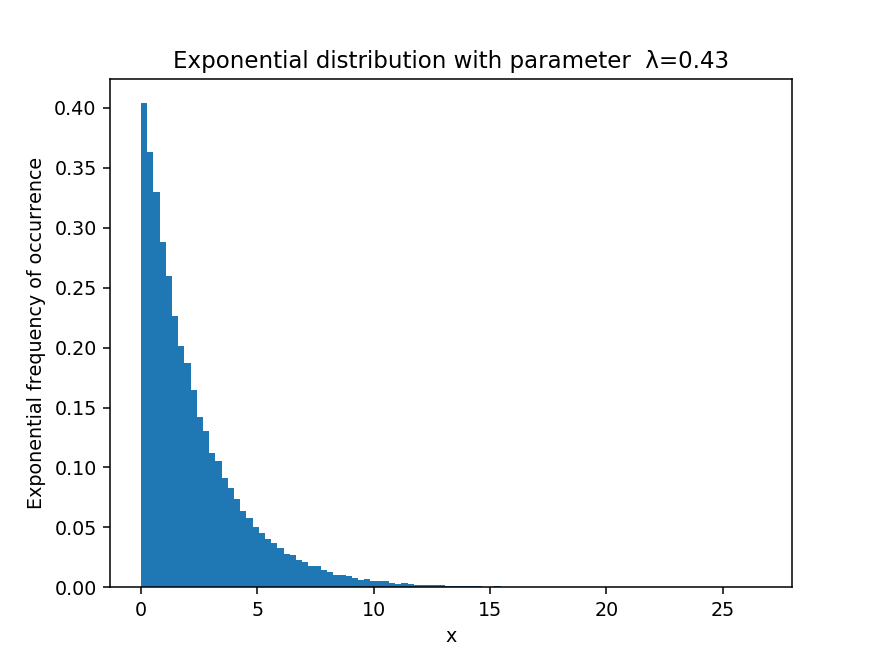

In [4]:
#Part(2c)

import random
import matplotlib.pyplot as plt

expoSamples = [random.expovariate(0.43) for i in range(100000)]
print(f"Exponential Samples(first ten samples) : {expoSamples[0:10]}")  #Take a look at the first 10
fig, axis = plt.subplots()
axis.hist(expoSamples, bins=100, normed=True)
axis.set_title(r"Exponential distribution with parameter  λ=0.43")
axis.set_xlabel("x")
axis.set_ylabel("Exponential frequency of occurrence")
fig.savefig("ExponentialHistogram.png")
plt.show()


In [44]:
#Part(2d)

def myGen():
    while True:
        yield "Hello Dr. B"
        yield "from Anish"
        yield "about CS6591"
g1 = myGen()
next(g1)

'Hello Dr. B'

In [5]:
next(g1)

NameError: name 'g1' is not defined

In [6]:
next(g1)

NameError: name 'g1' is not defined

In [7]:
next(g1)

NameError: name 'g1' is not defined

## Problem 3. A Minimal Packet Simulation Library
In this problem and the rest of the course we are going to use my [SimComponents.py](http://www.grotto-networking.com/files/DESPython/SimComponents.py) to perform network simulations directly in Python with the help of the [SimPy](https://simpy.readthedocs.io/en/latest/) library that you **need** to install using `pip install simpy`. 

**(a)** Connect a single *PacketGenerator* instance to a single *PacketSink* instance. Have the PacketGenerator generate a new packet every 5 seconds and have the packet size be exponentially distributed so that the average packet size is 200 bytes. Put the *PacketSink* into debug mode and run the simulation long enough to see four packet arrivals at the sink.

**(b)** Connect a three *PacketGenerator* instances to a single *PacketSink* instance. Have the PacketGenerator generate a new packet every 1, 2, and 3 seconds respectively and have the packet size be constant so that the average packet size is 425 bytes. Put the *PacketSink* into debug mode and run the simulation long enough to see four packet arrivals at the sink of each source at the sink. Give the sources some type of string identifier.

**(c)** In part (a) what is the average transmission rate of the source in bits per second?

**(d)** In part (a) if we assume that the packets are transmitted every 5 micro seconds what is the average transmission rate of the source in bits per second?



In [8]:
import simpy
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor

In [9]:
#Part(3a)

from random import expovariate
import simpy
from SimComponents import PacketGenerator, PacketSink

def constArrival():  # Constant arrival distribution for generator 1
    return 5.0

def distSize():
    return expovariate(0.005)

env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
ps = PacketSink(env, debug=True)  # debugging enable for simple output
pg = PacketGenerator(env, "B&M", constArrival, distSize)
# Wire packet generators and sink together
pg.out = ps
env.run(until=21)

id: 1, src: B&M, time: 5.0, size: 197.48278599194006
id: 2, src: B&M, time: 10.0, size: 10.991515364786695
id: 3, src: B&M, time: 15.0, size: 90.48742348923423
id: 4, src: B&M, time: 20.0, size: 102.39823719554938


In [10]:
#Part(3b)

def constArrival():  # Constant arrival distribution for generator 1
    return 1.0

def constArrival2():
    return 2.0

def constArrival3():
    return 3.0

def distSize():
    return 425

env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
ps = PacketSink(env, debug=True)  # debugging enable for simple output
pg = PacketGenerator(env, "Gen-1", constArrival, distSize)
pg2 = PacketGenerator(env, "Gen-2", constArrival2, distSize)
pg3 = PacketGenerator(env, "Gen-3", constArrival3, distSize)
# Wire packet generators and sink together
pg.out = ps
pg2.out = ps
pg3.out = ps
env.run(until=21)

id: 1, src: Gen-1, time: 1.0, size: 425
id: 1, src: Gen-2, time: 2.0, size: 425
id: 2, src: Gen-1, time: 2.0, size: 425
id: 1, src: Gen-3, time: 3.0, size: 425
id: 3, src: Gen-1, time: 3.0, size: 425
id: 2, src: Gen-2, time: 4.0, size: 425
id: 4, src: Gen-1, time: 4.0, size: 425
id: 5, src: Gen-1, time: 5.0, size: 425
id: 2, src: Gen-3, time: 6.0, size: 425
id: 3, src: Gen-2, time: 6.0, size: 425
id: 6, src: Gen-1, time: 6.0, size: 425
id: 7, src: Gen-1, time: 7.0, size: 425
id: 4, src: Gen-2, time: 8.0, size: 425
id: 8, src: Gen-1, time: 8.0, size: 425
id: 3, src: Gen-3, time: 9.0, size: 425
id: 9, src: Gen-1, time: 9.0, size: 425
id: 5, src: Gen-2, time: 10.0, size: 425
id: 10, src: Gen-1, time: 10.0, size: 425
id: 11, src: Gen-1, time: 11.0, size: 425
id: 4, src: Gen-3, time: 12.0, size: 425
id: 6, src: Gen-2, time: 12.0, size: 425
id: 12, src: Gen-1, time: 12.0, size: 425
id: 13, src: Gen-1, time: 13.0, size: 425
id: 7, src: Gen-2, time: 14.0, size: 425
id: 14, src: Gen-1, time: 14

#Part(3c)

->Transmission Rate is Data(bits)/Time(sec)
->Therefore, in Problem(3a), transmisson rate = (200 x 8) / 5 = **320 bits/sec**

#Part(3d)

->Transmission Rate is Data(bits)/Time(sec)
->Therefore, in Problem(3a), transmisson rate = (200 x 8) / 5 x 10^(-6) = **320,000,000 bits/sec**



## Problem 4. Many CBR Sources and a Single Switch Port


**(a)** Write or use my Python code in this notebook to create 100 constant bit rate (CBR) video sources (*PacketGenerator*s) to a switch port output (*SwitchPort*). Our sources will use constant length 1250 byte packets, transmitted every 2mS (5Mbps per stream). The switch port has an output bandwidth of 1Gbps.  We will want to monitor the output queue over time so you will also need to use a *PortMonitor*. Run this simulation for 6 ms. Do you see queues build up and go down? Why?

**(b)** Keeping the overall bit rate the same rerun the simulation with a packet size of 625 bytes. Does this appear to help.

**(c)** Rerun (a) and (b) but this time with the *PortMonitor* tracking bytes in the queue rather than packets in the queue `count_bytes=True`. From this perspective did reducing the packet size help? Will the smaller packets see a shorter average delay?

**(d)** In part (a) randomized the initial sending time for each source using a uniform random variable between 0 and the `packet_time`. Rerun the simulation and compare the plot to part (a). Did this help reduce the queue length? Is there a lesson here?


inter-packet arrival time = 2000.0 in micro seconds
Maximum wait = 1000.0 micro seconds
Maximum queue size in packets = 100


<IPython.core.display.Javascript object>


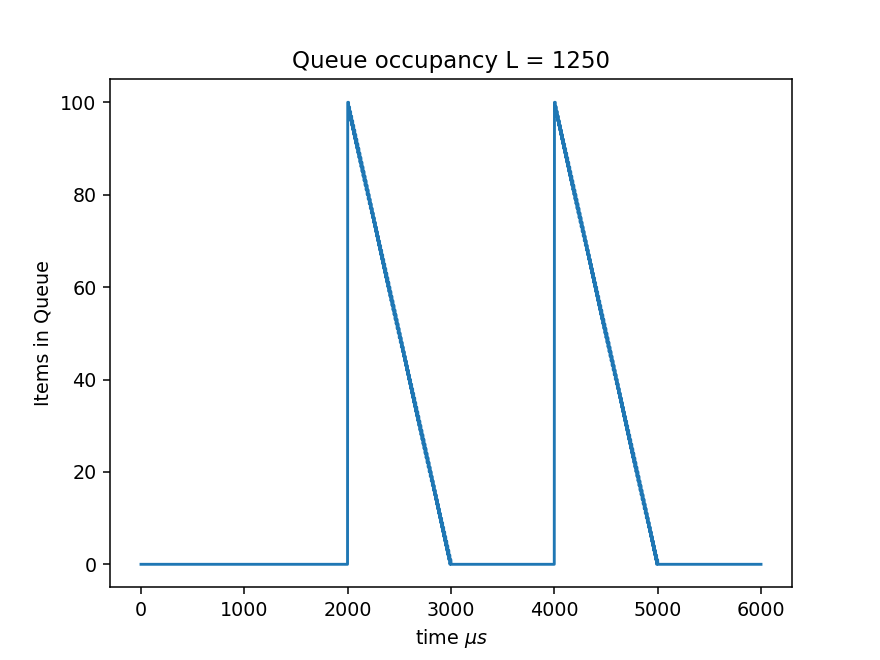

In [11]:
#Part(4a) 

#This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 1250    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=0)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=False)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
#print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

#Part(4a)

Yes, queue does build up and down. This is because of bytes per packet and avergae source rate.

inter-packet arrival time = 1000.0 in micro seconds
Maximum wait = 500.0 micro seconds
Maximum queue size in packets = 100


<IPython.core.display.Javascript object>


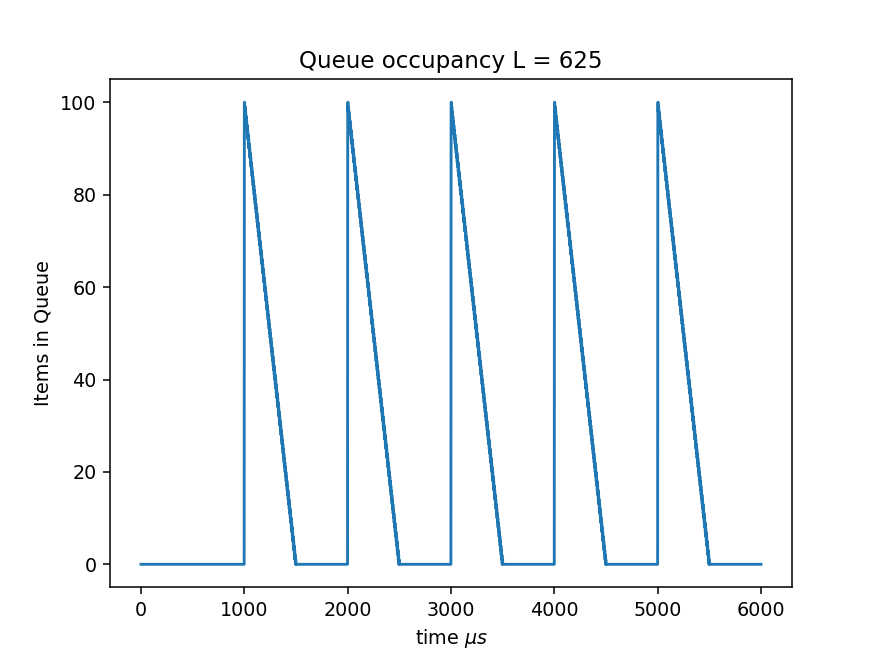

In [12]:
#Part(4b) 

#This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 625    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=0)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=False)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
#print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

#Part(4b)
Yes, this does help to appear. 

inter-packet arrival time = 2000.0 in micro seconds
Maximum wait = 1000.0 micro seconds
Maximum queue size in packets = 125000


<IPython.core.display.Javascript object>


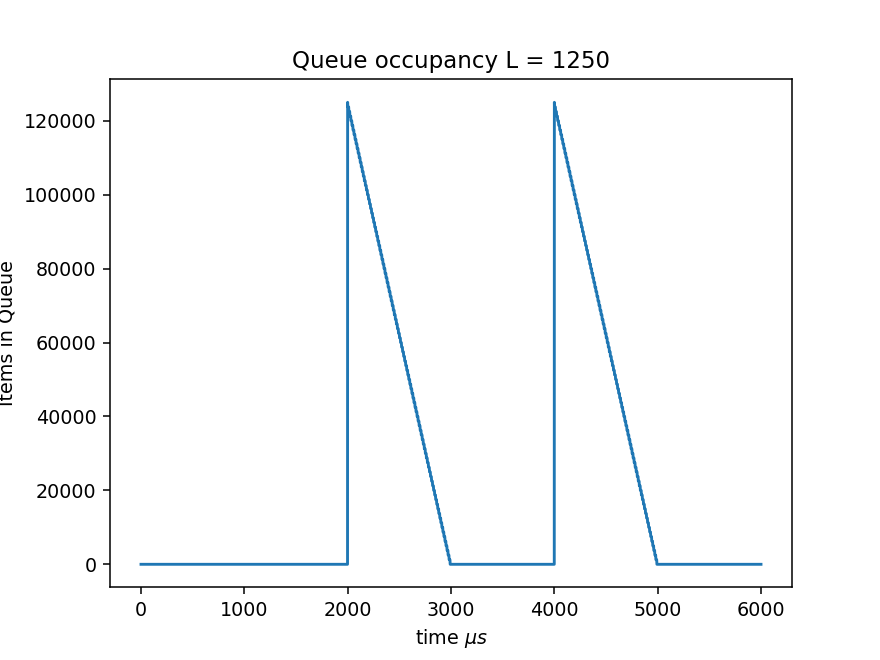

In [13]:
#Part(4c: 1st) 

#This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 1250    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=0)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=True)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
#print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

inter-packet arrival time = 1000.0 in micro seconds
Maximum wait = 500.0 micro seconds
Maximum queue size in packets = 62500


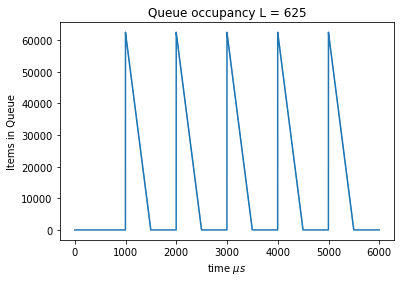

In [81]:
#Part(4c: 2nd) 

#This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 625    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=0)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=True)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
#print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

#Part(4c)

Yes, reducing the packet size help. Also,yes the smaller packet will see shorter average delays.

inter-packet arrival time = 2000.0 in micro seconds
Maximum wait = 56.04619424861221 micro seconds
Maximum queue size in packets = 6


<IPython.core.display.Javascript object>


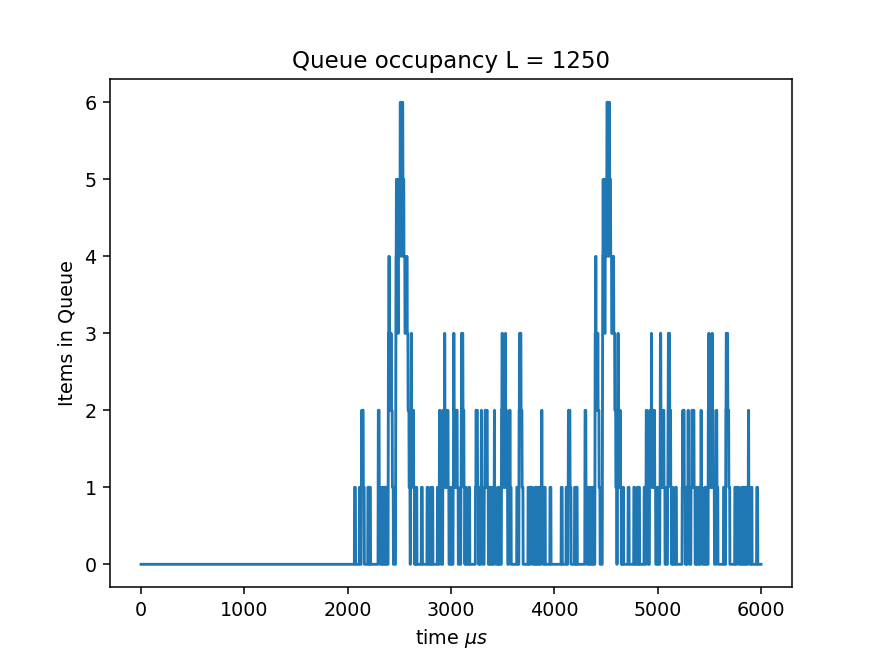

In [14]:
#Part(4d) 

#This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 1250    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=random.random()*packet_time)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=False)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
#print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

#Part(4d)
Yes, it did help reducing queue length. This is because of random assignment of the delay.

## Problem 5. Modeling a Switch Output Port (M/M/1 queueing system)

**(a)** Suppose we have a switch port with a 1Gbps rate, and that the packet sizes seen by the switch are exponentially distributed with a mean size of 755 bytes.  If the interarrival times of the packets are exponentially distributed what is the mean interarrive time to produce an average link utilization of 0.86?

**(b)** Given the above system (an M/M/1 queueing system) what would be the average delay seen by a packet and the average queue size?

**(c)** Simulate the above system. See [CompMM1Example.py](http://www.grotto-networking.com/files/DESPython/CompMM1Example.py) but use your numbers from part (a). Run the simulation long enough to see reasonable agreement between theory and simulation.



#Part(5a)

Given:
    μ = (755 x 8)/ 1 x 10^9
    ρ = 0.86
    
To find: λ
    
Solution:
    ρ = λ/μ
    λ = ρ x μ
      = 0.86 x 6040 x 10^-9
      = 5194.4 x 10^-9
    
**ANSWER : 5194.4 ns   **
    

In [15]:
#Part(5a: Prof's Solution)
rho=0.86
stimes = (755*8)/1.0e9
atimes = stimes/rho
atimes_micro = 1.0e6*atimes
print(atimes_micro)

7.0232558139534875


#Part(5b)

Given:
    λ = 5194.4 x 10^-9
    
To find: E[Delay]
    
Solution:
    E[Q] = λ x E[Delay]
    ρ/(1-ρ) = λ x E[Delay]
    E[Delay] = (6.1428)/(5194.4 x 10^-9)
             = 1.182 x 10^6  
**ANSWER : 1.182 MegaSec   **

In [16]:
#Part(5b: Prof's Solution)
queue_size = rho/(1-rho)
print(queue_size)

6.142857142857142


#Part(5c) is pending... 

In [17]:
#Part(5c: Prof's Solution)

import random
import functools
import simpy
import matplotlib.pyplot as plt
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor


if __name__ == '__main__':
    # Set up arrival and packet size distributions
    # Using Python functools to create callable functions for random variates with fixed parameters.
    # each call to these will produce a new random value.
    adist = functools.partial(random.expovariate, 1.0/atimes_micro)
    sdist = functools.partial(random.expovariate, 1.0/755)  # mean size 755 bytes
    samp_dist = functools.partial(random.expovariate, 1.0)
    port_rate = 1000.0

    env = simpy.Environment()  # Create the SimPy environment
    # Create the packet generators and sink
    ps = PacketSink(env, debug=False, rec_arrivals=True)
    pg = PacketGenerator(env, "Belgic", adist, sdist)
    switch_port = SwitchPort(env, port_rate)
    # Using a PortMonitor to track queue sizes over time
    pm = PortMonitor(env, switch_port, samp_dist)
    # Wire packet generators, switch ports, and sinks together
    pg.out = switch_port
    switch_port.out = ps
    # Run it
    env.run(until=800000)
    print("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))
    print(f"Number of packets recevied: {len(ps.waits)}")
    print("Last 10 queue sizes: {}".format(pm.sizes[-10:]))
    print("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))
    #print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))
    print("received: {}, dropped {}, sent {}".format(switch_port.packets_rec, switch_port.packets_drop, pg.packets_sent))
    print("loss rate: {}".format(float(switch_port.packets_drop)/switch_port.packets_rec))
    print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))

    # fig, axis = plt.subplots()
    # axis.hist(ps.waits, bins=100, normed=True)
    # axis.set_title("Histogram for waiting times")
    # axis.set_xlabel("time")
    # axis.set_ylabel("normalized frequency of occurrence")
    # fig.savefig("WaitHistogram.png")
    # plt.show()
    # fig, axis = plt.subplots()
    # axis.hist(ps.waits, bins=100, normed=True)
    # axis.set_title("Histogram for System Occupation times")
    # axis.set_xlabel("number")
    # axis.set_ylabel("normalized frequency of occurrence")
    # fig.savefig("QueueHistogram.png")
    #plt.show()


Last 10 waits: 11.572, 7.113, 9.639, 10.845, 6.920, 2.581, 2.395, 7.607, 4.813, 7.275
Number of packets recevied: 113805
Last 10 queue sizes: [0, 1, 3, 3, 3, 3, 3, 3, 3, 3]
Last 10 sink arrival times: 8.494, 1.642, 13.945, 3.990, 1.347, 4.978, 7.097, 8.142, 8.819, 8.468
received: 113808, dropped 0, sent 113808
loss rate: 0.0
average system occupancy: 6.345


6.1 and 6.3 almost perfectly equal!!